In [1]:
# # only need to import the function you want to use
#     # secondary functions, that are called within the imported one, don't need to be importex explicitly
# from volume_change import V_von_h

# V_von_h(10)

In [2]:
# create in and outflux vectors
import pandas as pd
import numpy as np
from numpy import cos,sin
from volume_change import V_h_test_1,h_V_test_1,V_h_test_2,h_V_test_2
from flow_patterns import return_flux_profiles,make_flux_df


t_max = 100
timestep = 1
time = np.arange(0,t_max,timestep)
#input identifiers
i_i = 'st_0010_0010'
#output identifiers
o_i = 'st_0010_0010'
# influx and outflux offset
i_o = 7.5
o_o = 8.
#outflux delay
o_d = 5

influx, outflux = return_flux_profiles(len(time),i_i,o_i,i_o,o_o,o_d)


h_0 = 0.

V_t = np.empty_like(time,dtype=float)
h_t = np.empty_like(time,dtype=float)
delta_Q = np.empty_like(time,dtype=float)
delta_V = np.empty_like(time,dtype=float)

for i in range(len(time)):
    delta_Q[i] = influx[i]-outflux[i]
    delta_V[i] = delta_Q[i]*timestep
    if i == 0:
        V_t[0] = V_h_test_2(h_0)
    else:
        V_t[i] = V_t[i-1]+delta_V[i]
    
    h_t[i] = h_V_test_2(V_t[i])

df = pd.DataFrame(np.transpose([time,influx,outflux,h_t,V_t]),columns=['time','influx','outflux','h_t','V_t'])

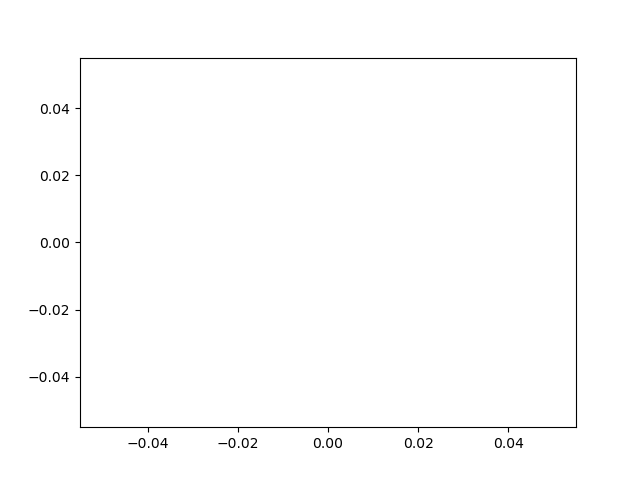

In [4]:
# try to draw h_t in an animated way
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, time[-1])
    ax.set_ylim(np.min(h_t)-1,np.max(h_t)+1)
    return ln,

def update(frame):
    xdata.append(time[frame])
    ydata.append(h_t[frame])
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(np.size(time)),
                    init_func=init, blit=True,repeat=False)
plt.show()

frames=np.arange(np.size(time))

In [ ]:
# # plot np.arrays with matplotlib
# %matplotlib widget
# from matplotlib import pyplot as plt

# #define color for plot
# iter_colors = iter(['blue','green','red','yellow'])

# #create figure with 3 stacked subplots
# fig_data,axs_data = plt.subplots(3,1,figsize=(7,10))

# #preparation for figure legend


# #fill subplots with data and assign handles to the line_objects (, is necessary, because )
# handle0, = axs_data[0].plot(time,h_t,marker='.',color=next(iter_colors))
# handle1, = axs_data[1].plot(time,V_t,marker='.',color=next(iter_colors))
# handle2, = axs_data[2].plot(time,influx,marker='.',color=next(iter_colors))
# handle3, = axs_data[2].plot(time,outflux,marker='.',color=next(iter_colors))


# #set subplot axis labels
# axs_data[0].set_ylabel(r'$h(t) \, / \, \mathrm{m}$')
# axs_data[0].set_xlabel(r'$t \, / \, \mathrm{s}$')
# axs_data[1].set_ylabel(r'$V(t) \, / \, \mathrm{m}$')
# axs_data[1].set_xlabel(r'$t \, / \, \mathrm{s}$')
# axs_data[2].set_ylabel(r'$Q(t)\, / \, \mathrm{m^3s^{-1}}$')
# axs_data[2].set_xlabel(r'$t \, / \, \mathrm{s}$')

# #give the axis labels enough space to be shown
# plt.tight_layout()

# # resize subplot widths, so that the legend can be shown besides them
# plt.subplots_adjust(right=0.8)

# # add legend
# handles = [handle0,handle1,handle2,handle3]
# legend_names = [r'$h(t)$',r'$V(t)$',r'$Q_{in}(t)$',r'$Q_{out}(t)$']
# fig_data.legend(handles,legend_names,loc = 'upper right')

# plt.show()


In [ ]:
# #plot with plolty
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = "vscode"


# fig1 = make_subplots(3,1,subplot_titles=('Height','Volume','Fluxes'))

# fig1.add_trace(go.Scatter(x=df['time'],y=df['h_t'],name='height',mode='lines+markers',marker=dict(size=5)),row=1,col=1)
# fig1.add_trace(go.Scatter(x=df['time'],y=df['V_t'],name='volume',mode='lines+markers',marker=dict(size=5)),row=2,col=1)
# fig1.add_trace(go.Scatter(x=df['time'],y=df['influx'],name='influx',mode='lines+markers',marker=dict(size=5)),row=3,col=1)
# fig1.add_trace(go.Scatter(x=df['time'],y=df['outflux'],name='outlfux',mode='lines+markers',marker=dict(size=5)),row=3,col=1)

# fig1.update_xaxes(title_text = 'time',row=1,col=1)
# fig1.update_xaxes(title_text = 'time',row=2,col=1)
# fig1.update_xaxes(title_text = 'time',row=3,col=1)
# fig1.update_yaxes(title_text = 'h(t)',row=1,col=1)
# fig1.update_yaxes(title_text = 'V(t)',row=2,col=1)
# fig1.update_yaxes(title_text = 'Q(t)',row=3,col=1)

# fig1.update_layout(height=700)

# fig2 = px.scatter(df,x='time',y='h_t',animation_frame='time')
# fig2.update_xaxes(range=[0,100])
# fig2.update_yaxes(range=[0,5])
# fig1.show()
# fig2.show('notebook')